### Adding libraries

* gym for environment simulation
* matplotlin for plotting results
* keras-rl2 for implementation of reinforcement learning

In [22]:
import numpy as np
import gym
import matplotlib.pyplot as plt

from Model import *
from env import Dataset_A_env

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
import keras

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

### Loading environment for Dataset_A
* Loading dataset and saving shuffled and splitted train and test(30 percent) data
* Giving +1 reward for True predictions and -1 for wrong predictions (considering discrete integer actions as our predictions)
* plotting cumulative reward function

Table 4
The information of four different structures.
No. Layer type Structure-1 Structure-2 Structure-3 Structure-4
* 1 | The input layer..................| 784 | 784 | 784 | 784
* 2 Convolution_1......................| 20,4,1, same | 25,3,1, same | 30,5,1, same | 32,3,1, same
* 3 Max-pooling_1.....................| – | – | – | –
* 4 Convolution_2......................| 40,4,1, same | 50,3,1, same | 60,5,1, same | 64,3,1, same
* 5 Max-pooling_2.....................| – | – | – | –
* 6 Flatten......................................| – | – | – | –
* 7 Fully-connected...................| 128 | 128 | 128 | 128
* 8 Dropout...................................| 0.1 | 0.1 | 0.1 | 0.1
* 9 The output layer..................| LS | LS | LS | LS


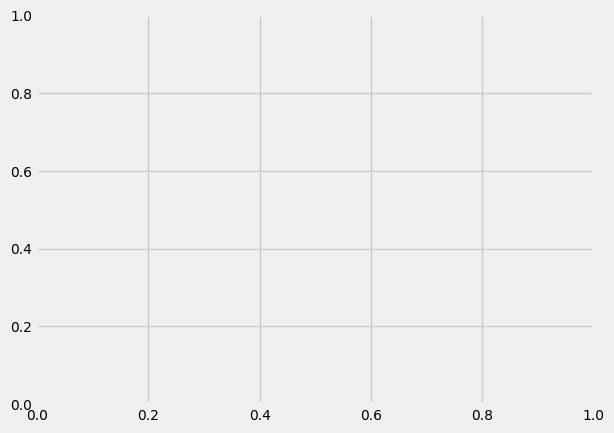

In [24]:
# Building the environment
env1 = Dataset_A_env()
np.random.seed(0)
num_actions = 10 #env.action_space.n

### Creating Deep Q-network arcutecture for first model based on structure 4

In [25]:
num_actions = 10
agent = create_model(4, num_actions)
# agent.add(Activation('linear'))
agent.build()


#### Architecture of selected model with structure number *

In [26]:
agent.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)             

### Training RL model on Dataset_A and plotting cumulative rewards

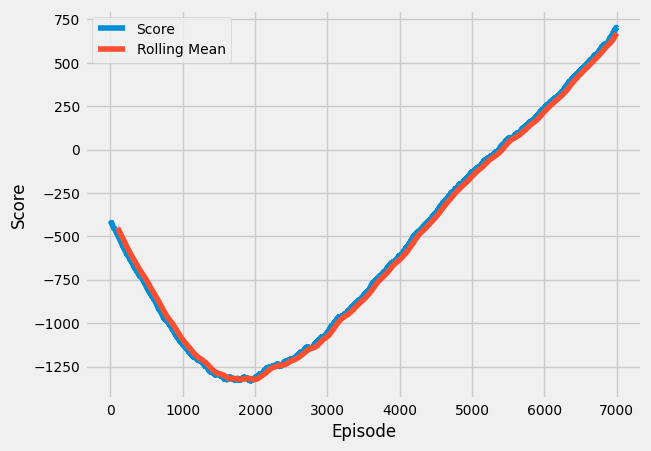

 7000/7000: episode: 7000, duration: 0.389s, episode steps:   1, steps per second:   3, episode reward:  1.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 2.000 [2.000, 2.000],  loss: 0.020192, mse: 0.908497, mean_q: 0.685422
done, took 2239.531 seconds


In [27]:
strategy = EpsGreedyQPolicy()
memory = SequentialMemory(limit = 10000, window_length = 1)
dqn = DQNAgent(model = agent, nb_actions = num_actions,memory = memory, nb_steps_warmup = 10, target_model_update = 1e-2, policy = strategy)
dqn.compile(Adam(lr = 1e-3), metrics =['mse'])#mae

history_agent = dqn.fit(env1, nb_steps = 7000, visualize = True, verbose = 2)
# dqn.model.load_weights('structure_4_first_model')


### Transfer Learning

making new structure using first 4 layer of previous trained model and new raw layers

In [28]:
# TransferLearning_layers = dqn.model.layers[0:5]
# temp = create_model(4, num_actions)
# temp.build()
# temp_layers = temp.layers[1::]

# DRTCNN_Model = tf.keras.Sequential()
# DRTCNN_Model.add(tf.keras.layers.InputLayer(input_shape=(1, 1, 784,)))
# for i in range(len(TransferLearning_layers)):
#     DRTCNN_Model.add(TransferLearning_layers[i])
# for i in range(len(temp_layers)):
#     DRTCNN_Model.add(temp_layers[i])
# DRTCNN_Model.build()

In [29]:
# agent.load_weights('struct4_w')
TransferLearning_layers = agent.layers[0:5]

DRTCNN_Model = tf.keras.Sequential()
DRTCNN_Model.add(tf.keras.layers.InputLayer(input_shape=(1, 1, 784,)))
# DRTCNN_Model.add(tf.keras.layers.InputLayer(input_shape=(784,)))
for i in range(len(TransferLearning_layers)):
    DRTCNN_Model.add(TransferLearning_layers[i])
DRTCNN_Model.add(tf.keras.layers.Conv2D(32, 3, strides=1, padding='same', activation='relu'))
DRTCNN_Model.add(tf.keras.layers.MaxPooling2D())
DRTCNN_Model.add(tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
DRTCNN_Model.add(tf.keras.layers.MaxPooling2D())
DRTCNN_Model.add(tf.keras.layers.Flatten())
DRTCNN_Model.add(tf.keras.layers.Dense(128, activation='relu'))
DRTCNN_Model.add(tf.keras.layers.Dropout(0.1))
DRTCNN_Model.add(tf.keras.layers.Dense(num_actions))
DRTCNN_Model.add(Activation('linear'))

DRTCNN_Model.build()

#### Architecture of transfered layers connected to selected model with structure number *

In [30]:
DRTCNN_Model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)         

### making DQN-RL based on proposed structure

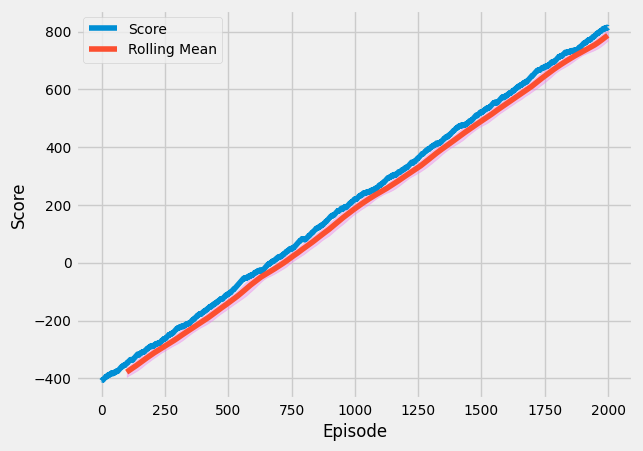

 2000/2000: episode: 2000, duration: 0.281s, episode steps:   1, steps per second:   4, episode reward:  1.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 8.000 [8.000, 8.000],  loss: 0.010881, mse: 0.852694, mean_q: 0.642391
done, took 583.456 seconds


In [31]:
env2 = Dataset_A_env()
np.random.seed(0)

strategy = EpsGreedyQPolicy()
memory = SequentialMemory(limit = 10000, window_length = 1)
dqn_DRTCNN_Model = DQNAgent(model = DRTCNN_Model, nb_actions = num_actions,memory = memory, nb_steps_warmup = 10, target_model_update = 1e-2, policy = strategy)
dqn_DRTCNN_Model.compile(Adam(lr = 1e-3), metrics =['mse'])#mae

# dqn.model.load_weights('struct4_w')
# Visualizing the training
history_DRTCNN_Model = dqn.fit(env2, nb_steps = 2000, visualize = True, verbose = 2)


### Saving trained model weights

In [32]:
# dqn.model.save_weights('structure_4_first_model')
# dqn_DRTCNN_Model.model.save_weights('weightsstructure_4_second_model')

### Saving history of training process

In [33]:
# np.save('history_struct4_one.npy',history_agent.history)
# np.save('history_struct4_two.npy',history_DRTCNN_Model.history)